## EPSP

In [1]:
%matplotlib inline

import numpy as np
from numpy import random
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
from operator import add
import itertools
import seaborn as sns
import os
import sys
Path = os.getcwd()
sys.path.append(Path)
from build_network import *
from utilities1 import psd, psd_Vm, simulated_SNR, save_figure




              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.7.0
 Built: May 19 2024 15:53:53

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
def sinus(phi, f, A, t):
    return phi+A*np.sin(2 * np.pi * f * t/1000 + np.pi/2)

In [3]:
def plot_epsp(sim_time=5000, noisy=False, 
              second_sine=False,xLim=1,
              a_values=[100], SD_values=[250], f_values=[12], beat=20, E_m=-60, V_th=-50,
              bin_size=0.25,seed=np.random.randint(0,1e+6), resolution=0.25, num_A=100,
              log=True, harmonics=1, harmonics_beat=0, save_fig=False,
              measure_from_A=False, seed_check=False, w_values=[1], ylim=[-61,-58], 
              plot_theoretical_sine=False):
    """This function plots the epsp of the postsynaptic neuron.
    See 'psd_network for explanation of arguments"""
    
    ###*************************SIMULATION**************************************
    tau_m = 10
    E_m_si = E_m*1e-3
    V_target_si = -55*1e-3 - E_m_si #dette gir <10mV, som er endringen vi ønsker 
    tau_si = 10*1e-3 #s
    R_si = 0.1*1e+9 #ohm
    mean_list = []
    dV = []
    

   

    if noisy:

        param_combos = list(itertools.product(f_values,a_values, SD_values, w_values))
        
    else:
        param_combos = list(itertools.product(f_values, a_values, w_values))
    
    param_combos = np.atleast_1d(param_combos) #to allow for one single combination
    
        
    fig, axes = plt.subplots(len(param_combos), 
                             figsize=(10, 4*len(param_combos)))
    
    if len(param_combos) == 1:
        axes = np.array([axes])
    
    
    for idx, combo  in enumerate(param_combos):
        if noisy:
            f, a, sd, w = combo
                    
            results = build_network(sim_time=sim_time, noisy=True, second_sine=second_sine, V_thresh=V_th,
                                    f1=f, beat=beat, a=a, SD=sd, tau_m=tau_m, num_A=num_A,
                                    seed=seed, resolution=resolution, measure_from_A=measure_from_A)                    
            
        else:
            f,a, w = combo
                
            results = build_network(sim_time=sim_time, second_sine=second_sine, noisy=False, 
                                        f1=f, a=a,V_thresh=V_th, E_m=E_m, tau_m=tau_m, num_A=num_A,
                                        seed=seed, beat=beat, resolution=resolution, measure_from_A=measure_from_A, weight=w)
                
         #********************************RESULTS AND PLOTS******************************** 
        
        Vm = results["Vm"]
        dV.append(np.max(Vm)-E_m)
        spike_times = results["spike_times"]
        V_th = results["V_th"]
        sim_time = results["sim_time"]
        times = results["times"]
        tot_spike_rate = results["tot_spike_rate"]
        T = np.linspace(0,sim_time,1000)
        sine = []
        for t in T:
            sine.append(sinus(phi=2.5, f=20, A=5, t=t))
            

        
        # Layout
        sns.set_style("whitegrid")
        plt.rcParams["font.family"] = "Liberation Serif"
        
    
        ax_vm = axes[idx]
            
        time_axis = np.linspace(0,sim_time,len(Vm))
        
            
        ax_vm.plot(times, Vm-E_m, color='indianred')#'#006D5B')
        
        
        if noisy:
            ax_vm.set_title(rf"Vm (f={f}Hz, SD={sd}pA, $I_{{\mathrm{{amp}}}}$={a:.2f}pA, w={w}, epsa={(np.max(Vm)-E_m):.3f})",
                           fontsize=18, fontweight='bold', color="#006D5B")
            if second_sine:
                ax_vm.set_title(rf"Vm (f1={f}Hz, f2={f+beat}Hz, $I_{{\mathrm{{amp}}}}$={a:.0f}pA)",
                                fontsize=18, fontweight='bold', color="#006D5B")
                if plot_theoretical_sine:
                    plt.plot(T, sine, color="#006D5B")
             
        else:
            ax_vm.set_title(rf"EPSP (f={f}Hz,  $I_{{\mathrm{{amp}}}}$={a:.1f}pA, w={w:.2f}",fontsize=18, fontweight='bold', color="#006D5B")
            if second_sine:
                ax_vm.set_title(rf"$V_m$ (f₁={f} Hz, f₂={f + beat} Hz, $I_{{\mathrm{{amp}}}}$ = {a:.2f} pA)",
                                fontsize=18, fontweight='bold', color="#006D5B")
        ax_vm.set_xlim([0, xLim*1000])
        ax_vm.set_ylim(-10,10)
        ax_vm.set_xlabel("ms", color="#006D5B", fontsize=16)
        ax_vm.set_ylabel("mV", color="#006D5B", fontsize=16)
            
        #chat-gpt:
        ax_vm.set_facecolor("#F5F5F5")
        ax_vm.spines["top"].set_visible(False)
        ax_vm.spines["right"].set_visible(False)
        ax_vm.spines["left"].set_color("#333333")
        ax_vm.spines["bottom"].set_color("#333333")
        ax_vm.xaxis.label.set_color("#006D5B")
        ax_vm.yaxis.label.set_color("#006D5B")
        ax_vm.tick_params(axis='both', colors="#333333", labelsize='large')
        ax_vm.legend(facecolor="white", framealpha=1, edgecolor="#333333")
        if save_fig:
            save_figure("epsp")
        
 
    plt.tight_layout()
    plt.show()
    
        


May 16 10:51:53 correlospinmatrix_detector [Info]: 
    Default for delta_tau changed from 0.1 to 0.25 ms

May 16 10:51:53 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.25 ms.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Saved plot as: /mnt/user/shared/Tonjes_CompNeuro/comp_neuro_course/master/notebooks/results/epsp.png


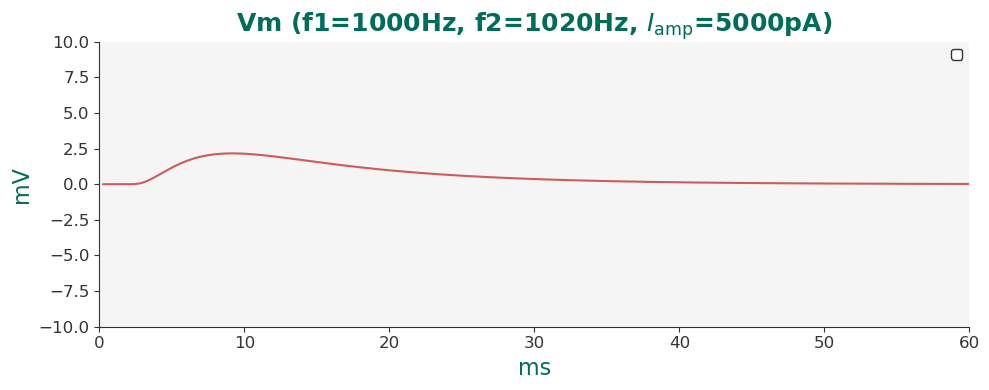

In [4]:
plot_epsp(sim_time=100e3,  
        second_sine=True,xLim=0.06,noisy=True,
        a_values=[5000], SD_values=[0], f_values=[1000], E_m=-60, V_th=-50,
        bin_size=0.25, resolution=0.25, num_A=100,
        log=True, save_fig=True, beat=20,
        w_values=[1], plot_epsp_w=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Saved plot as: /mnt/user/shared/Tonjes_CompNeuro/comp_neuro_course/master/notebooks/results/epsp.png


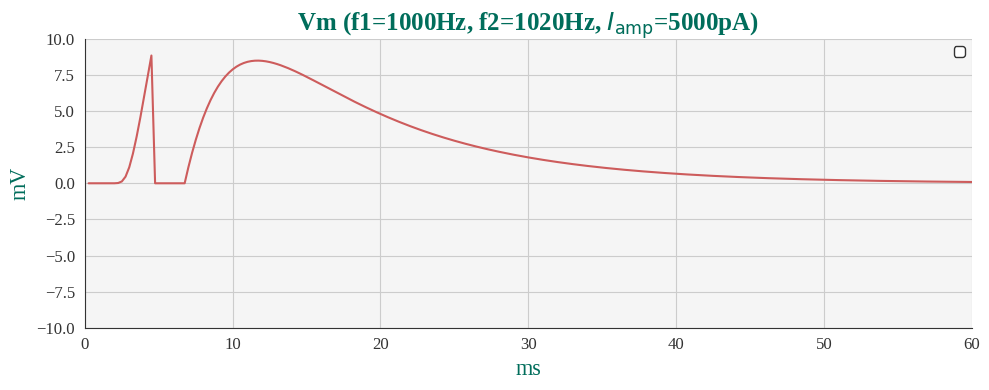

In [5]:
plot_epsp(sim_time=100e3,  
                 second_sine=True,xLim=0.06,noisy=True,
                 a_values=[5000], SD_values=[0], f_values=[1000], E_m=-60, V_th=-50,
                 bin_size=0.25, resolution=0.25, num_A=1000,
                 log=True, save_fig=True,beat=20,
                 measure_from_A=False, w_values=[1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Saved plot as: /mnt/user/shared/Tonjes_CompNeuro/comp_neuro_course/master/notebooks/results/epsp.png


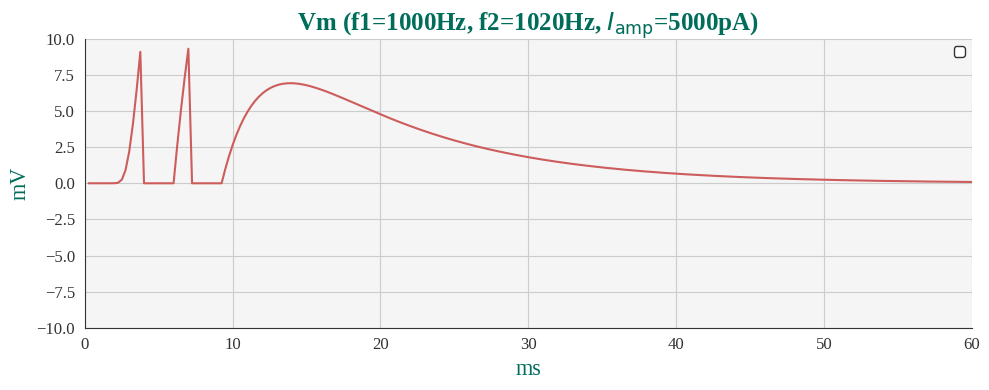

In [6]:
plot_epsp(sim_time=10e3,  
                 second_sine=True,xLim=0.06,noisy=True, beat=20,
                 a_values=[5000], SD_values=[0], f_values=[1000], E_m=-60, V_th=-50,
                 bin_size=0.25, resolution=0.25, num_A=2000,
                 log=True, save_fig=True,
                 measure_from_A=False, w_values=[1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
Font 'default' does not have a glyph for '\u2081' [U+2081], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2082' [U+2082], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2081' [U+2081], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2082' [U+2082], substituting with a dummy symbol.


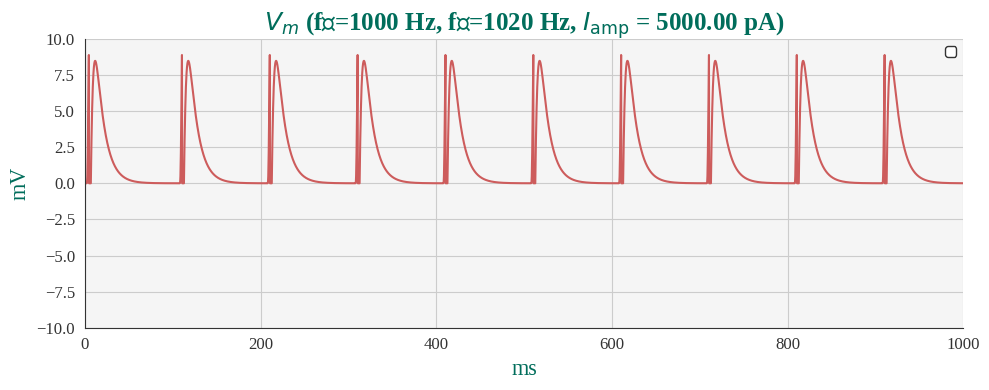

In [7]:
plot_epsp(sim_time=100e3,  
                 second_sine=True,xLim=1,noisy=False, beat=20,
                 a_values=[5000], f_values=[1000], E_m=-60, V_th=-50, resolution=0.25, num_A=1000,
                 measure_from_A=False, w_values=[1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
Font 'default' does not have a glyph for '\u2081' [U+2081], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2082' [U+2082], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2081' [U+2081], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2082' [U+2082], substituting with a dummy symbol.


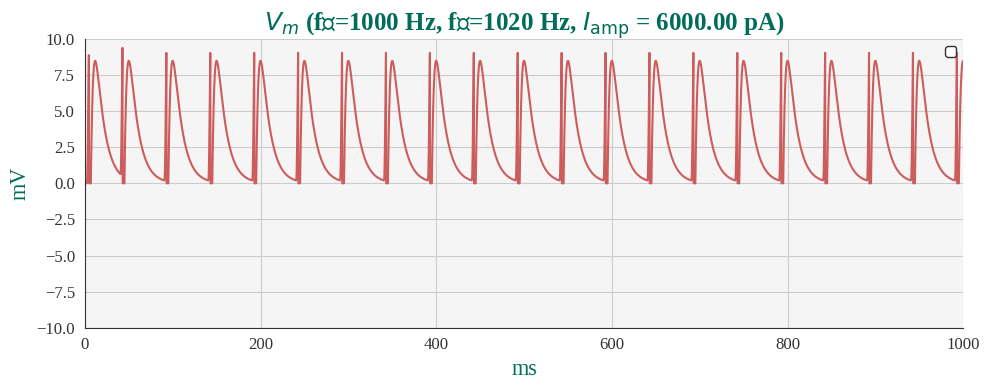

In [8]:
plot_epsp(sim_time=100e3,  
                 second_sine=True,xLim=1,noisy=False, beat=20,a_values=[6000],
          f_values=[1000], E_m=-60, V_th=-50, resolution=0.25, num_A=1000,
                 measure_from_A=False, w_values=[1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Saved plot as: /mnt/user/shared/Tonjes_CompNeuro/comp_neuro_course/master/notebooks/results/epsp.png


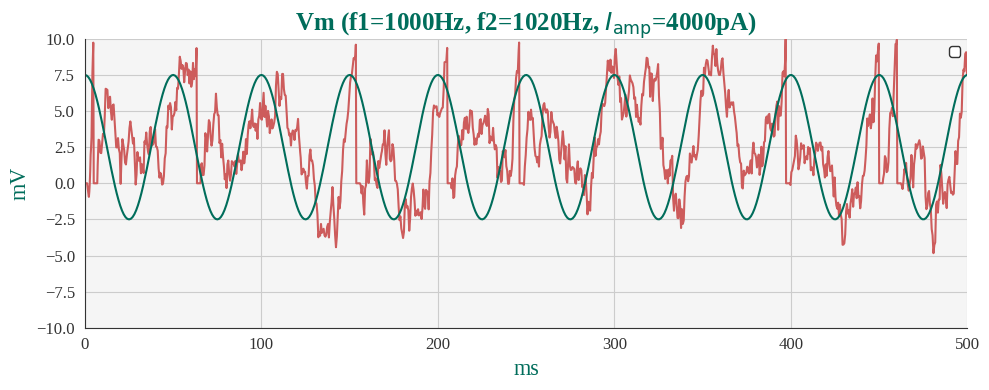

In [9]:
plot_epsp(sim_time=1e3,  
                 second_sine=True,xLim=0.5,noisy=True, beat=20, save_fig=True, 
                 a_values=[4000], f_values=[1000], SD_values=[250], E_m=-60, V_th=-50, resolution=0.25, num_A=1000,
                 measure_from_A=False, w_values=[1], plot_epsp_w=False, plot_theoretical_sine=True)